---
20/06/2023

<img src="249 Analatica - Logo-19.png" alt="Logo" style="display: block; margin-left: auto; margin-right: auto; width: 200px;">

# <p style="text-align: center;"><span style="color:#0077D4;">249Analytica Company</span></p>

---

# <p style="text-align: center;"><span style="color:black![249 Analatica - Logo-19.png.png](attachment:49912ee0-3595-4bb0-af56-1862b0ce6c57.png);">Grape Diseases Detection Model</span></p>

---
# Introduction:

The purpose of this report is to present the results and evaluation of a Grape Disease Detection model. The model was developed to accurately classify grape plants as healthy or infected with specific diseases, including Black Rot, Esca, and Leaf Blight. The model was trained and evaluated using a dataset containing images of grape plants.

---
# Essential Libraries and Modules 

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras
from tensorflow.keras import layers

---
# Data Preparation and Path Handling

In [6]:
data_dir = 'C:/Users/DELL/Documents/Datasets/Plant Diseases Dataset/Grape'

# Create paths for infected and uninfected images
healthy_path = os.path.join(data_dir, 'Grape___healthy')
Black_rot_path = os.path.join(data_dir, 'Grape___Black_rot')
Esca_path = os.path.join(data_dir, 'Grape___Esca_(Black_Measles)')
Leaf_blight_path = os.path.join(data_dir, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)')

# Read the images and create labels
healthy_images = [os.path.join(healthy_path, img) for img in os.listdir(healthy_path)]
Black_rot_images = [os.path.join(Black_rot_path, img) for img in os.listdir(Black_rot_path)]
Esca_images = [os.path.join(Esca_path, img) for img in os.listdir(Esca_path)]
Leaf_blight_images = [os.path.join(Leaf_blight_path, img) for img in os.listdir(Leaf_blight_path)]

# Create a dataframe to store image paths and labels
data = pd.DataFrame(
    {'image_path': healthy_images +
     Black_rot_images + 
     Esca_images+
     Leaf_blight_images,
    'label': ['Healthy'] * len(healthy_images) + 
     ['Infected: Black_rot'] * len(Black_rot_images) +
     ['Infected: Esca'] * len(Esca_images)+
     ['Infected: Leaf_blight'] * len(Leaf_blight_images)})

In [7]:
data

,image_path,label
0,C:/Users/DELL/Documents/Datasets/Plant Disease...,Healthy
1,C:/Users/DELL/Documents/Datasets/Plant Disease...,Healthy
2,C:/Users/DELL/Documents/Datasets/Plant Disease...,Healthy
3,C:/Users/DELL/Documents/Datasets/Plant Disease...,Healthy
4,C:/Users/DELL/Documents/Datasets/Plant Disease...,Healthy
...,...,...
7217,C:/Users/DELL/Documents/Datasets/Plant Disease...,Infected: Leaf_blight
7218,C:/Users/DELL/Documents/Datasets/Plant Disease...,Infected: Leaf_blight
7219,C:/Users/DELL/Documents/Datasets/Plant Disease...,Infected: Leaf_blight
7220,C:/Users/DELL/Documents/Datasets/Plant Disease...,Infected: Leaf_blight


---
# Splitting Data into Training and Testing Sets

In [8]:
# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
     data['image_path'], data['label'],
     test_size=0.1, random_state=42
)

---
# Data Loading and Preprocessing

In [9]:

# Load and preprocess training and testing images using ImageDataGenerator
image_generator = ImageDataGenerator(
    rescale=1./255, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True   
)
# Load and preprocess training images
train_images = image_generator.flow_from_dataframe(
    dataframe=pd.DataFrame({'image_path': train_data, 'label': train_labels}),
    x_col='image_path', y_col='label',
    target_size=(64, 64), batch_size=32
)

# Load and preprocess testing images
test_images = image_generator.flow_from_dataframe(
    dataframe=pd.DataFrame({'image_path': test_data, 'label': test_labels}),
    x_col='image_path', y_col='label',
    target_size=(64, 64), batch_size=32
)

Found 6499 validated image filenames belonging to 4 classes.
Found 723 validated image filenames belonging to 4 classes.


---
# Building (CNN) Model

In [23]:
# Create a sequential model
model = Sequential()

# Add convolutional and pooling layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps
model.add(Flatten())

# Add fully connected layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Adjust the number of units in the output layer based on the number of classes
num_classes = 4
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
# Set early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history = model.fit(
    train_images, epochs=30, 
    validation_data=test_images, 
    callbacks=[early_stopping]
)

Epoch 1/30
204/204 [==============================] - 66s 316ms/step - loss: 0.9350 - accuracy: 0.5733 - val_loss: 0.4697 - val_accuracy: 0.8230
Epoch 2/30
204/204 [==============================] - 38s 187ms/step - loss: 0.4504 - accuracy: 0.8201 - val_loss: 0.2527 - val_accuracy: 0.9170
Epoch 3/30
204/204 [==============================] - 38s 187ms/step - loss: 0.3193 - accuracy: 0.8797 - val_loss: 0.2352 - val_accuracy: 0.9018
Epoch 4/30
204/204 [==============================] - 39s 189ms/step - loss: 0.2370 - accuracy: 0.9166 - val_loss: 0.1176 - val_accuracy: 0.9502
Epoch 5/30
204/204 [==============================] - 38s 188ms/step - loss: 0.1884 - accuracy: 0.9343 - val_loss: 0.1668 - val_accuracy: 0.9378
Epoch 6/30
204/204 [==============================] - 38s 188ms/step - loss: 0.1620 - accuracy: 0.9431 - val_loss: 0.0850 - val_accuracy: 0.9696
Epoch 7/30
204/204 [==============================] - 38s 188ms/step - loss: 0.1437 - accuracy: 0.9486 - val_loss: 0.0983 - val_ac

In [25]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_images)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

23/23 [==============================] - 3s 107ms/step - loss: 0.0181 - accuracy: 0.9931
Test Loss: 0.018092148005962372
Test Accuracy: 0.9930843710899353


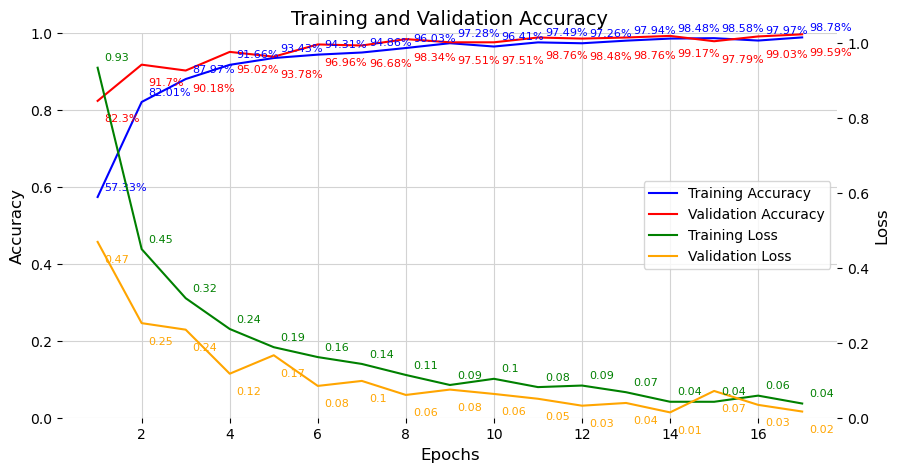

In [26]:
import matplotlib.pyplot as plt

# Extract accuracy and loss values from the training history
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Number of epochs
epochs = range(1, len(training_accuracy) + 1)

# Create the figure and axes for the plot
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot the trend line for training accuracy
ax1.plot(epochs, training_accuracy, 'b', label='Training Accuracy')

# Plot the trend line for validation accuracy
ax1.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')

# Set y-axis limits for accuracy
ax1.set_ylim([0, 1])

# Set plot title, x-axis label, and y-axis label for accuracy
ax1.set_title('Training and Validation Accuracy', fontsize=14)
ax1.set_xlabel('Epochs', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)

# Create a twin y-axis for loss
ax2 = ax1.twinx()

# Plot the trend line for training loss
ax2.plot(epochs, training_loss, 'green', label='Training Loss')

# Plot the trend line for validation loss
ax2.plot(epochs, validation_loss, 'orange', label='Validation Loss')

# Set y-axis limits for loss
ax2.set_ylim([0, max(training_loss + validation_loss) * 1.1])

# Set y-axis label for loss
ax2.set_ylabel('Loss', fontsize=12)

# Remove the frames of the plot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

# Add gridlines
ax1.grid(color='lightgray', linestyle='-')

# Customize tick labels
ax1.tick_params(axis='both', which='major', labelsize=10)

# Add labels to the data points for accuracy
for i, acc in enumerate(training_accuracy):
    ax1.annotate(
        f'{round(acc*100, 2)}%', xy=(i+1, acc), xytext=(5, 5),
        textcoords='offset points', fontsize=8, color='b'
    )
    
for i, acc in enumerate(validation_accuracy):
    ax1.annotate(
        f'{round(acc*100, 2)}%', xy=(i+1, acc), xytext=(5, -15), 
        textcoords='offset points', fontsize=8, color='r'
    )

# Add labels to the data points for loss
for i, loss in enumerate(training_loss):
    ax2.annotate(
        f'{round(loss, 2)}', xy=(i+1, loss), xytext=(5, 5),
        textcoords='offset points', fontsize=8, color='green'
    )
    
for i, loss in enumerate(validation_loss):
    ax2.annotate(
        f'{round(loss, 2)}', xy=(i+1, loss), xytext=(5, -15), 
        textcoords='offset points', fontsize=8, color='orange'
    )

# Combine the legend for accuracy and loss and position it in the middle right
handles, labels = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(handles + handles2, labels + labels2, fontsize=10, loc='center right')

# Save the plot as an image
plt.savefig('Accuracy and Loss Trend_2.png', dpi=300)

# Display the plot
plt.show()

The model's accuracy and loss trend can be visualized using line plots. The x-axis represents the number of training epochs, while the y-axis represents the corresponding accuracy or loss value. The accuracy and loss trend plots indicate the model's performance throughout the training process